# Weighted sampling

In [1]:
import random as rd
import numpy as np
import itertools, bisect
from matplotlib import pyplot as plt

## problem description

You are given n numbers in an array `nums`, as well as probabilities $p_0$, $p_1$, ... , $p_{n - 1}$ which sum up to 1 in an array `probs`. 
How would you generate one of the n numbers according to the specified probabilities?

For example, if the numbers are 3, 5, 7, 11, and the probabilities are 9/18, 6/18, 2/18, 1/18, then 1000000 calls to your program, 3 should appear roughly 500000 times, 5 should appear roughly 333333 times, 7 should appear roughly 111111 times, and 11 should appear roughly 55555 times.

## strategy

Based on `probs`, we can divide the interval $[0,1]$ into $I = [0, p_0, p_0+p_1, p_0+p_1+p_2,...]$. This can be either easily done by progressively adding probabilities in `probs`, or using the `accumulate()` function from `itertools`.

Generate a uniform random number $U(0,1)$ and check what part of $I$ it falls onto (binary search). 
If it falls onto the $i$-th part of $I$, return `nums[i-1]`.

In [2]:
# sample one number
def weighted_sampling(nums, probs):
    
    prob_intervals = [0.0]
    cumulative = 0
    for p in probs:
        cumulative += p
        prob_intervals.append(cumulative)
    # prob_intervals = [0.0] + list(itertools.accumulate(probs))
    
    interval_idx = bisect.bisect(prob_intervals, rd.random()) - 1
    return nums[interval_idx]

# run the sampling process N times
# results are stored in a dictionary containing the numbers along with frequencies
def run_weighted_sampling(N, nums, probs):
    sample = {}
    for _ in range(N):
        num = weighted_sampling(nums, probs)
        sample[num] = sample.get(num, 0) + 1
    
    values = [num for num in sample.keys()]
    freqs = [counts/N for counts in sample.values()]
    plt.scatter(values, freqs, label='frequencies')
    plt.scatter(nums, probs, label='probalilities')
    plt.legend(loc='upper right')
    plt.show()
    return sample

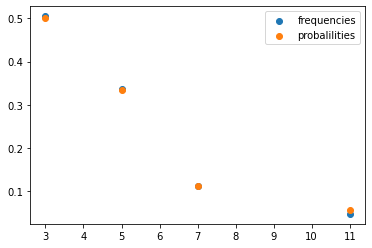

{3: 505, 5: 337, 7: 111, 11: 47}

In [3]:
nums1 = [3, 5, 7, 11]
probs1 = [9/18, 6/18, 2/18, 1/18]
run_weighted_sampling(1000, nums1, probs1)